# DEVANSH VERMA
# prn- 1914110299
# seat.no.- 2020261015
# Perform Single and Multiple regression model

In [439]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score

# Health

# The data (X1, X2, X3, X4, X5) are by city.
# X1 = death rate per 1000 residents
# X2 = doctor availability per 100,000 residents
# X3 = hospital availability per 100,000 residents
# X4 = annual per capita income in thousands of dollars
# X5 = population density people per square mile
# Reference: Life In America's Small Cities, by G.S. Thomas

In [440]:
df=pd.read_csv(r"G:\CLASS\sem 3\Computation Statistics\Health.csv")

In [441]:
df.head()

,X1,X2,X3,X4,X5
0,8.0,78,284,9.1,109
1,9.3,68,433,8.7,144
2,7.5,70,739,7.2,113
3,8.9,96,1792,8.9,97
4,10.2,74,477,8.3,206


In [442]:
df.describe()

,X1,X2,X3,X4,X5
count,53.00000,53.000000,53.000000,53.000000,53.000000
mean,9.30566,116.094340,589.792453,9.435849,110.641509
std,1.66253,37.886604,332.618305,1.075442,47.179728
min,3.60000,60.000000,190.000000,7.200000,35.000000
25%,8.30000,82.000000,353.000000,8.800000,80.000000
50%,9.40000,114.000000,525.000000,9.500000,103.000000
75%,10.30000,134.000000,686.000000,10.300000,129.000000
max,12.80000,238.000000,1792.000000,13.000000,292.000000


In [443]:
df.shape

(53, 5)

# Relationship in data

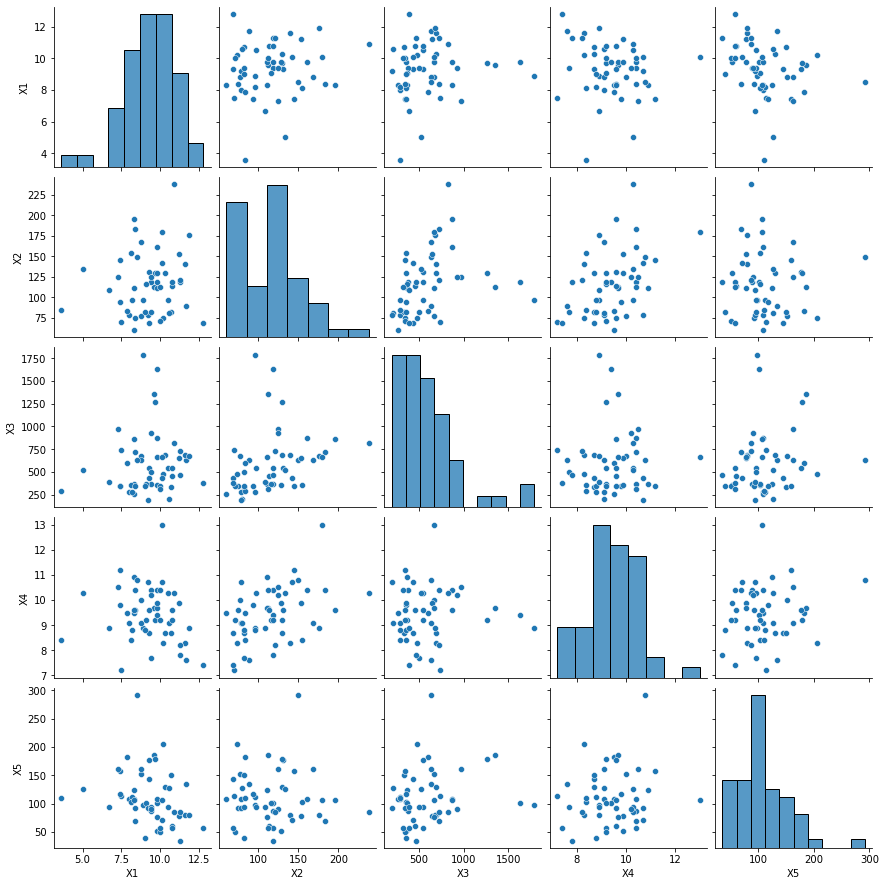

In [444]:
g = sns.pairplot(df, kind='scatter')

In [445]:
df.corr()

,X1,X2,X3,X4,X5
X1,1.000000,0.115765,0.110590,-0.171992,-0.277607
X2,0.115765,1.000000,0.295628,0.433288,-0.019938
X3,0.110590,0.295628,1.000000,0.027504,0.186616
X4,-0.171992,0.433288,0.027504,1.000000,0.128744
X5,-0.277607,-0.019938,0.186616,0.128744,1.000000


<AxesSubplot:>

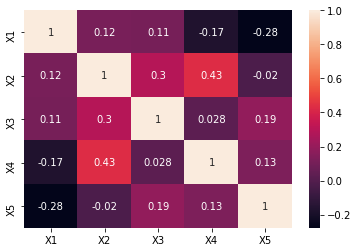

In [446]:
sns.heatmap(df.corr(), annot=True)

# Detecting and Replacing outliers

<AxesSubplot:xlabel='X1'>

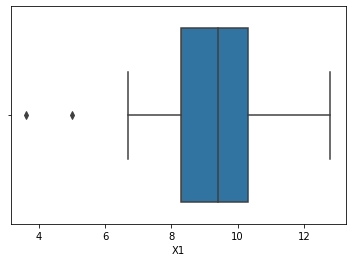

In [447]:
sns.boxplot(x=df['X1'])

In [448]:
dfw = df['X1']
dfw_Q1 = dfw.quantile(0.25)
dfw_Q3 = dfw.quantile(0.75)
dfw_IQR = dfw_Q3 - dfw_Q1
dfw_lowerend = dfw_Q1 - (1.5 * dfw_IQR)
dfw_upperend = dfw_Q3 + (1.5 * dfw_IQR)
dfw_outliers = dfw[(dfw < dfw_lowerend) | (dfw > dfw_upperend)]
dfw_outliers

30    5.0
42    3.6
Name: X1, dtype: float64

# Replacing outliers with mean 

In [449]:
mean = float(df['X1'].mean())
df["X1"] = np.where(df["X1"] <6, mean,df['X1'])

<AxesSubplot:xlabel='X2'>

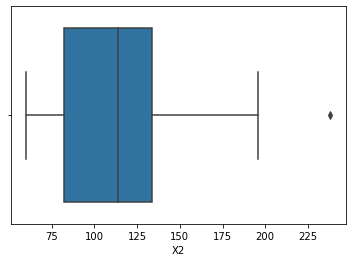

In [450]:
sns.boxplot(x=df['X2'])

In [451]:
dfw = df['X2']
dfw_Q1 = dfw.quantile(0.25)
dfw_Q3 = dfw.quantile(0.75)
dfw_IQR = dfw_Q3 - dfw_Q1
dfw_lowerend = dfw_Q1 - (1.5 * dfw_IQR)
dfw_upperend = dfw_Q3 + (1.5 * dfw_IQR)
dfw_outliers = dfw[(dfw < dfw_lowerend) | (dfw > dfw_upperend)]
dfw_outliers

35    238
Name: X2, dtype: int64

In [452]:
#Replacing outliers with mean
mean = float(df['X2'].mean())
df["X2"] = np.where(df["X2"] >237, mean,df['X2'])

<AxesSubplot:xlabel='X3'>

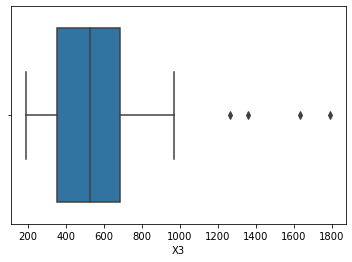

In [453]:
sns.boxplot(x=df['X3'])

In [454]:
dfw = df['X3']
dfw_Q1 = dfw.quantile(0.25)
dfw_Q3 = dfw.quantile(0.75)
dfw_IQR = dfw_Q3 - dfw_Q1
dfw_lowerend = dfw_Q1 - (1.5 * dfw_IQR)
dfw_upperend = dfw_Q3 + (1.5 * dfw_IQR)
dfw_outliers = dfw[(dfw < dfw_lowerend) | (dfw > dfw_upperend)]
dfw_outliers

3     1792
16    1357
19    1264
22    1632
Name: X3, dtype: int64

In [455]:
#Replacing outliers with mean
mean = float(df['X3'].mean())
df["X3"] = np.where(df["X3"] >1000, mean,df['X3'])

<AxesSubplot:xlabel='X4'>

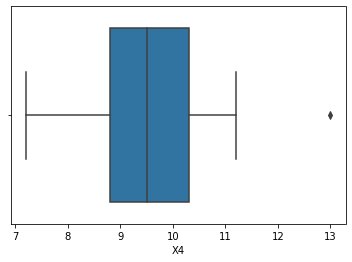

In [456]:
sns.boxplot(x=df['X4'])

In [457]:
dfw = df['X4']
dfw_Q1 = dfw.quantile(0.25)
dfw_Q3 = dfw.quantile(0.75)
dfw_IQR = dfw_Q3 - dfw_Q1
dfw_lowerend = dfw_Q1 - (1.5 * dfw_IQR)
dfw_upperend = dfw_Q3 + (1.5 * dfw_IQR)
dfw_outliers = dfw[(dfw < dfw_lowerend) | (dfw > dfw_upperend)]
dfw_outliers

45    13.0
Name: X4, dtype: float64

In [458]:
#Replacing outliers with mean
mean = float(df['X4'].mean())
df["X4"] = np.where(df["X4"] >12, mean,df['X4'])

<AxesSubplot:xlabel='X5'>

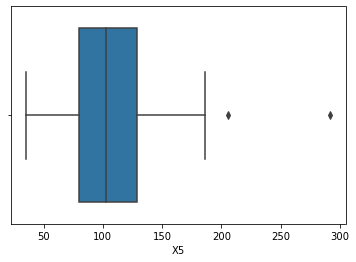

In [459]:
sns.boxplot(x=df['X5'])

In [460]:
dfw = df['X5']
dfw_Q1 = dfw.quantile(0.25)
dfw_Q3 = dfw.quantile(0.75)
dfw_IQR = dfw_Q3 - dfw_Q1
dfw_lowerend = dfw_Q1 - (1.5 * dfw_IQR)
dfw_upperend = dfw_Q3 + (1.5 * dfw_IQR)
dfw_outliers = dfw[(dfw < dfw_lowerend) | (dfw > dfw_upperend)]
dfw_outliers

4     206
10    292
Name: X5, dtype: int64

In [461]:
#Replacing outliers with mean
mean = float(df['X5'].mean())
df["X5"] = np.where(df["X5"] >12, mean,df['X5'])

In [462]:
df1=df

In [463]:
df1.shape

(53, 5)

# Linear Regression

In [500]:
y = df1[['X2']] # doctor availability per 100,000 residents
X = df1[['X3']] # hospital availability per 100,000 residents

In [501]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [502]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [503]:
print('Model intercept: ', reg.intercept_)
print('Model coefficients: ', reg.coef_)

Model intercept:  [65.1831046]
Model coefficients:  [[0.09114423]]


In [504]:
y_pred = reg.predict(X_train)

In [505]:
y_predi = pd.DataFrame(y_pred, columns=['Predict X2'])
y_predi.head()

,Predict X2
0,118.939285
1,97.448163
2,131.536105
3,153.501865
4,97.357018


In [506]:
r2_score(y_train, y_pred)

0.28956309475003483

Text(0.5, 1.0, ' Regression Model for Health')

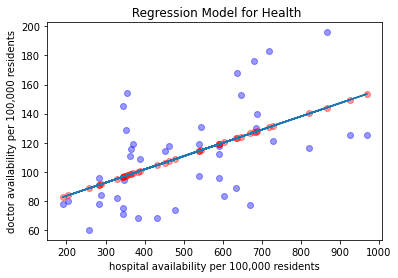

In [509]:
plt.scatter(X_train['X3'], y_train, color='blue', alpha=0.4)
plt.scatter(X_train['X3'], y_predi, color='red', alpha=0.4)
# Best fit line
m, b = np.polyfit(X_train['X3'], y_predi, 1)
plt.plot(X_train['X3'], m*X_train['X3'] + b)
plt.xlabel('hospital availability per 100,000 residents')
plt.ylabel('doctor availability per 100,000 residents')
plt.title(' Regression Model for Health')

# multiple regression

In [523]:
y = df1['X1'] # death rate per 1000 residents
X = df1[['X2','X3','X4','X5']]# X2 = doctor availability per 100,000 residents,X3 = hospital availability per 100,000 residents,
                         #X4 = annual per capita income in thousands of dollars,X5 = population density people per square mile

In [524]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [525]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [526]:
print('Model intercept: ', reg.intercept_)
print('Model coefficients: ', reg.coef_)

Model intercept:  16.367562994399773
Model coefficients:  [-1.30125466e-03  1.55172271e-03 -8.02193938e-01  1.03610375e-29]


In [527]:
y_pred = reg.predict(X_train)

In [528]:
r2_score(y_train, y_pred)

0.27254687644355147

In [529]:
#from sklearn.model_selection import cross_val_score
#cross_val_score_train = cross_val_score(reg, X_train, y_train, cv=10, scoring='r2')
#print(cross_val_score_train)

In [530]:
#cross_val_score_train.mean()

In [531]:
y_pred = reg.predict(X_test)

In [532]:
y_pred1 = pd.DataFrame(y_pred, columns=['Predict X1'])
y_pred1.head()

,Predict X1
0,8.745252
1,11.647402
2,8.369350
3,9.479945
4,9.165243


In [533]:
y_test1 = pd.DataFrame(y_test)
y_test1 = y_test1.reset_index(drop=True)
y_test1.head()

,X1
0,9.30566
1,7.50000
2,10.00000
3,9.80000
4,9.80000


In [534]:
ynew = pd.concat([y_test1, y_pred1], axis=1)
ynew

,X1,Predict X1
0,9.30566,8.745252
1,7.50000,11.647402
2,10.00000,8.369350
3,9.80000,9.479945
4,9.80000,9.165243
5,9.00000,9.740001
6,10.10000,8.266551
7,9.40000,10.858277
8,10.10000,9.600507
9,9.70000,9.733410


#  Visual Representation of Regression

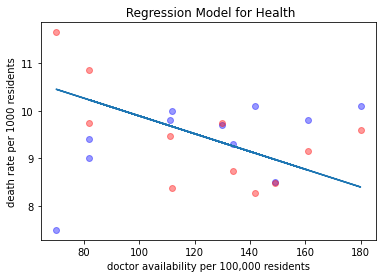

In [541]:
plt.scatter(X_test['X2'], y_test, color='blue', alpha=0.4)
plt.scatter(X_test['X2'], y_pred1, color='red', alpha=0.4)
plt.xlabel('doctor availability per 100,000 residents')
plt.ylabel('death rate per 1000 residents')
plt.title(' Regression Model for Health')
m, b = np.polyfit(X_test['X2'], y_pred1, 1)
plt.plot(X_test['X2'], m*X_test['X2'] + b)

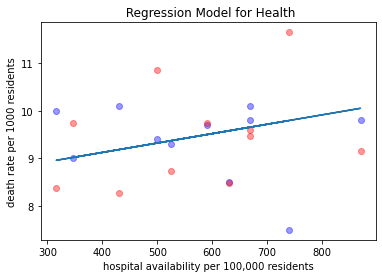

In [542]:
plt.scatter(X_test['X3'], y_test, color='blue', alpha=0.4)
plt.scatter(X_test['X3'], y_pred1, color='red', alpha=0.4)
plt.xlabel('hospital availability per 100,000 residents')
plt.ylabel('death rate per 1000 residents')
plt.title(' Regression Model for Health')
m, b = np.polyfit(X_test['X3'], y_pred1, 1)
plt.plot(X_test['X3'], m*X_test['X3'] + b)

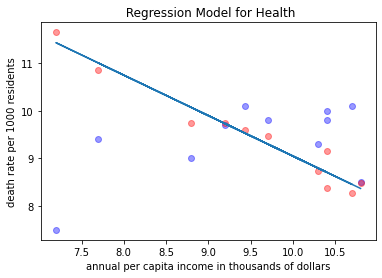

In [549]:
plt.scatter(X_test['X4'], y_test, color='blue', alpha=0.4)
plt.scatter(X_test['X4'], y_pred1, color='red', alpha=0.4)
plt.xlabel('annual per capita income in thousands of dollars')
plt.ylabel('death rate per 1000 residents')
plt.title(' Regression Model for Health')
m, b = np.polyfit(X_test['X4'], y_pred1, 1)
plt.plot(X_test['X4'], m*X_test['X4'] + b)

# ########################################

# Changes made-
# not to drop the outliers but replace them with MEAN
# draw best fit line for regression

# DEVANSH VERMA
# prn- 1914110299
# seat.no.- 2020261015